In [1]:
import sys
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cuml.linear_model import LogisticRegression as cuMLLogisticRegression

print('NOVA_HOME is at', os.getenv('NOVA_HOME'))
sys.path.insert(1, os.getenv('NOVA_HOME'))
%load_ext autoreload
%autoreload 2

from utils import *

NOVA_HOME is at /home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA
NOVA_HOME: /home/projects/hornsteinlab/Collaboration/NOVA_GAL/NOVA


In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from cuml.ensemble import RandomForestClassifier as cuRF
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
dataset_config = {
    "path_to_embeddings": "/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen",
    "multiplexed": False,
    "config_fmt": "NIH_UMAP1_DatasetConfig_B{batch}",
    "config_dir": "manuscript/manuscript_figures_data_config",
}

2025-08-27 14:17:50 INFO: [load_embeddings] multiplex=False
2025-08-27 14:17:50 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:17:50 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-27 14:17:50 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen


Loading all batches...


2025-08-27 14:17:52 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-27 14:17:53 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-27 14:17:54 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-27 14:17:54 INFO: [load_embeddings] embeddings shape: (115587, 192)
2025-08-27 14:17:54 INFO: [load_embeddings] labels shape: (115587,)
2025-08-27 14:17:54 INFO: [load_embeddings] example label: DAPI_WT_Untreated
2025-08-27 14:17:54 INFO: [load_embeddings] paths shape: (115587,)
2025-08-27 14:17:54 INFO: [load_embeddings] multiplex=False
2025-08-27 14:17:54 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:17:54 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-27 14:17:54 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-27 14:17:56 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08

Batches loaded.
Training on Batches: [1], Testing on: [2, 3].

=== Fold (test=[2, 3]) ===
Train: (115587, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Test: (181189, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
DAPI_WT_Untreated: 30428
TUJ1_WT_Untreated: 22601
LAMP1_WT_Untreated: 3067
DCP1A_WT_Untreated: 2364
TDP43_WT_Untreated: 2534
P54_WT_Untreated: 2622
SNCA_WT_Untreated: 2454
CLTC_WT_Untreated: 2439
PEX14_WT_Untreated: 2505
PURA_WT_Untreated: 2712
G3BP1_WT_Untreated: 2842
Phalloidin_WT_Untreated: 2219
NEMO_WT_Untreated: 2935
SQSTM1_WT_Untreated: 2651
PML_WT_Untreated: 2297
GM130_WT_Untreated: 2371
Calreticulin_WT_Untreated: 3056
KIF5A_WT_Untreated: 2622
FMRP_WT_Untreated: 2913
NCL_WT_Untreated: 2709
TOMM20_WT_Untreated: 2363
FUS_WT_Untreated: 2728
MitoTracker_WT_Untreated: 2728
TIA1_WT_Untreated: 2712
PSD95_WT_Untreated: 2101
ANAX11_WT_Untreated: 2614
              precision    recall 


=== Fold (test=[1, 2]) ===
Train: (87130, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Test: (209646, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
TUJ1_WT_Untreated: 16469
KIF5A_WT_Untreated: 2358
Calreticulin_WT_Untreated: 2332
DAPI_WT_Untreated: 22599
PML_WT_Untreated: 1623
TIA1_WT_Untreated: 2078
P54_WT_Untreated: 1751
CLTC_WT_Untreated: 2044
PURA_WT_Untreated: 2085
FMRP_WT_Untreated: 1492
PSD95_WT_Untreated: 1903
LAMP1_WT_Untreated: 2340
PEX14_WT_Untreated: 1855
TDP43_WT_Untreated: 1836
ANAX11_WT_Untreated: 1850
NEMO_WT_Untreated: 2117
Phalloidin_WT_Untreated: 2152
SNCA_WT_Untreated: 1857
DCP1A_WT_Untreated: 1901
TOMM20_WT_Untreated: 2200
FUS_WT_Untreated: 2095
NCL_WT_Untreated: 2085
SQSTM1_WT_Untreated: 1484
G3BP1_WT_Untreated: 2384
GM130_WT_Untreated: 2145
MitoTracker_WT_Untreated: 2095
              precision    recall  f1-score   support

           0       0.89      0.95      0.9

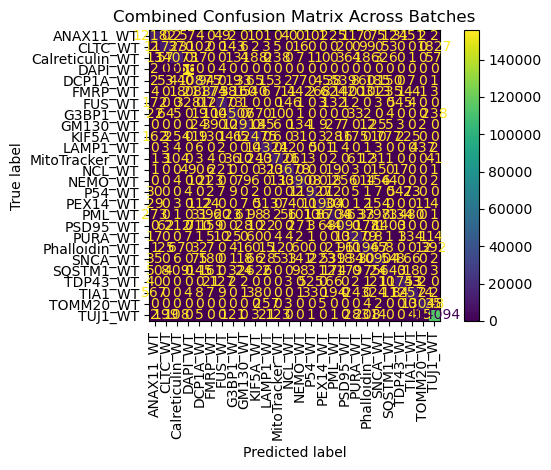

2025-08-27 14:18:10 INFO: [load_embeddings] multiplex=False
2025-08-27 14:18:10 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:18:10 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-27 14:18:10 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen



=== Evaluation Metrics (from aggregated confusion) ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV       F1  Overall Accuracy
      ANAX11_WT_Untreated  0.995928     0.924700     0.997545 0.895274 0.998289 0.909749               NaN
        CLTC_WT_Untreated  0.995296     0.835090     0.999177 0.960902 0.996018 0.893589               NaN
Calreticulin_WT_Untreated  0.996396     0.942346     0.997791 0.916748 0.998511 0.929371               NaN
        DAPI_WT_Untreated  0.999233     0.999961     0.998975 0.997124 0.999986 0.998541               NaN
       DCP1A_WT_Untreated  0.990188     0.825866     0.993916 0.754894 0.996041 0.788787               NaN
        FMRP_WT_Untreated  0.987406     0.632753     0.995990 0.792481 0.991155 0.703667               NaN
         FUS_WT_Untreated  0.996902     0.904732     0.999147 0.962765 0.997682 0.932846               NaN
       G3BP1_WT_Untreated  0.997805     0.968295     0.998569 0.946006 0.999179 0.957021

2025-08-27 14:18:13 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-27 14:18:13 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-27 14:18:14 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-27 14:18:14 INFO: [load_embeddings] embeddings shape: (115587, 192)
2025-08-27 14:18:14 INFO: [load_embeddings] labels shape: (115587,)
2025-08-27 14:18:14 INFO: [load_embeddings] example label: DAPI_WT_Untreated
2025-08-27 14:18:14 INFO: [load_embeddings] paths shape: (115587,)
2025-08-27 14:18:14 INFO: [load_embeddings] multiplex=False
2025-08-27 14:18:14 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:18:14 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-27 14:18:14 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen
2025-08-27 14:18:16 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08

Batches loaded.
Training on Batches: [1], Testing on: [2, 3].

=== Fold (test=[2, 3]) ===
Train: (115587, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Test: (181189, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
DAPI_WT_Untreated: 30428
TUJ1_WT_Untreated: 22601
LAMP1_WT_Untreated: 3067
DCP1A_WT_Untreated: 2364
TDP43_WT_Untreated: 2534
P54_WT_Untreated: 2622
SNCA_WT_Untreated: 2454
CLTC_WT_Untreated: 2439
PEX14_WT_Untreated: 2505
PURA_WT_Untreated: 2712
G3BP1_WT_Untreated: 2842
Phalloidin_WT_Untreated: 2219
NEMO_WT_Untreated: 2935
SQSTM1_WT_Untreated: 2651
PML_WT_Untreated: 2297
GM130_WT_Untreated: 2371
Calreticulin_WT_Untreated: 3056
KIF5A_WT_Untreated: 2622
FMRP_WT_Untreated: 2913
NCL_WT_Untreated: 2709
TOMM20_WT_Untreated: 2363
FUS_WT_Untreated: 2728
MitoTracker_WT_Untreated: 2728
TIA1_WT_Untreated: 2712
PSD95_WT_Untreated: 2101
ANAX11_WT_Untreated: 2614


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3973
           1       0.98      0.81      0.89      4580
           2       0.96      0.96      0.96      4411
           3       1.00      1.00      1.00     47422
           4       0.83      0.82      0.83      4220
           5       0.82      0.79      0.81      4100
           6       0.99      0.92      0.95      4331
           7       0.96      0.98      0.97      4649
           8       0.98      0.98      0.98      4255
           9       0.95      0.86      0.90      4462
          10       0.96      0.95      0.95      4583
          11       0.97      0.98      0.98      4331
          12       0.98      0.99      0.99      4312
          13       0.92      0.97      0.94      4477
          14       0.95      0.95      0.95      3667
          15       0.97      0.94      0.95      3929
          16       0.91      0.73      0.81      3441
          17       0.68    

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4464
           1       0.96      0.78      0.86      4483
           2       0.96      0.96      0.96      5388
           3       1.00      1.00      1.00     53027
           4       0.80      0.87      0.84      4265
           5       0.85      0.73      0.79      4405
           6       0.97      0.96      0.97      4823
           7       0.97      0.98      0.98      5226
           8       0.96      0.99      0.97      4516
           9       0.90      0.92      0.91      4980
          10       0.96      0.95      0.96      5407
          11       0.99      0.98      0.98      4823
          12       0.98      0.99      0.99      4794
          13       0.87      0.99      0.93      5052
          14       0.96      0.96      0.96      4373
          15       0.96      0.94      0.95      4360
          16       0.86      0.79      0.82      3920
          17       0.69    

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.96      0.94      4737
           1       0.94      0.96      0.95      4975
           2       0.90      0.96      0.93      5135
           3       1.00      1.00      1.00     55251
           4       0.66      0.86      0.75      4683
           5       0.78      0.43      0.55      5521
           6       0.98      0.91      0.94      4964
           7       0.89      0.99      0.93      5107
           8       0.96      0.99      0.97      4481
           9       0.58      0.92      0.71      4726
          10       0.95      0.93      0.94      5310
          11       0.98      0.99      0.98      4964
          12       0.99      0.99      0.99      4936
          13       0.97      0.90      0.93      5295
          14       0.96      0.96      0.96      4538
          15       0.90      0.96      0.93      4579
          16       0.80      0.84      0.82      4115
          17       0.84    

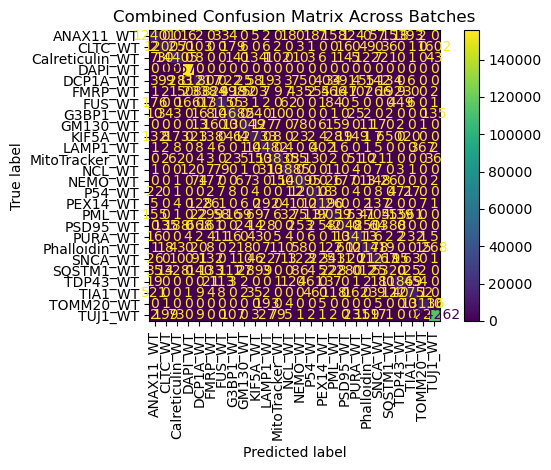


=== Evaluation Metrics (from aggregated confusion) ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV       F1  Overall Accuracy
      ANAX11_WT_Untreated  0.996785     0.941324     0.998044 0.916150 0.998667 0.928566               NaN
        CLTC_WT_Untreated  0.995662     0.855321     0.999061 0.956657 0.996504 0.903155               NaN
Calreticulin_WT_Untreated  0.997486     0.964577     0.998336 0.937337 0.999085 0.950762               NaN
        DAPI_WT_Untreated  0.999660     1.000000     0.999539 0.998704 1.000000 0.999352               NaN
       DCP1A_WT_Untreated  0.990516     0.851838     0.993663 0.753072 0.996628 0.799416               NaN
        FMRP_WT_Untreated  0.987947     0.629474     0.996623 0.818561 0.991082 0.711672               NaN
         FUS_WT_Untreated  0.997837     0.931789     0.999446 0.976180 0.998340 0.953468               NaN
       G3BP1_WT_Untreated  0.997894     0.979976     0.998358 0.939227 0.999481 0.959169

({'Accuracy': 0.9956438266830616,
  'Sensitivity': 0.9015500177055193,
  'Specificity': 0.9977383929366652,
  'PPV': 0.9043883461883884,
  'NPV': 0.997763962105646,
  'F1': 0.9011614013355506,
  'Overall Accuracy': 0.9433697468798016},
 {'Accuracy': 0.9956668237232454,
  'Sensitivity': 0.9025730353738828,
  'Specificity': 0.9977496228381416,
  'PPV': 0.9083546275272391,
  'NPV': 0.9977771596059583,
  'F1': 0.9019713749781145,
  'Overall Accuracy': 0.9436687084021894})

In [7]:
## New Train on one batch, test on rest


run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3],
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    train_each_as_singleton=True,
    results_csv = 'classification_results-NIH-training_iteration.csv'
)
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3],
    classifier_class=LinearSVC,
    classifier_kwargs={"C": 1.0, "max_iter": 1000, "random_state": 42},
    train_each_as_singleton=True,
    results_csv = 'classification_results-NIH-training_iteration.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)

In [ ]:
run_train_test_split_baseline(
    dataset_config,        
    batches=[1],  
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},     
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=GaussianNB,
    classifier_kwargs={},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=RidgeClassifier,
    classifier_kwargs={},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=LinearSVC,
    classifier_kwargs={"C": 1.0, "max_iter": 1000, "random_state": 42},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
run_baseline_model(
    dataset_config,
    batches=[1,2,3,],
    classifier_class=cuRF,
    classifier_kwargs={"n_estimators": 300, "random_state": 42},  # max_depth=0 => unlimited in cuML
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
run_baseline_model(dataset_config,
    batches=[1,2,3],
    classifier_class=ExtraTreesClassifier,
    classifier_kwargs={"n_estimators": 300, "max_depth": None, "min_samples_leaf": 1,
                                     "n_jobs": -1, "random_state": 42},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

## Cytoself

In [8]:
Cytoself_dataset_config = {
    "path_to_embeddings": "/home/projects/hornsteinlab/Collaboration/NOVA/outputs/cytoself_model/",
    "multiplexed": False,
    "config_fmt": "NIH_UMAP1_DatasetConfig_B{batch}",
    "config_dir": "manuscript/manuscript_figures_data_config",
}

2025-08-27 14:19:13 INFO: [load_embeddings] multiplex=False
2025-08-27 14:19:13 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:19:13 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-27 14:19:13 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/cytoself_model/


Loading all batches...


2025-08-27 14:19:27 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-27 14:19:29 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-27 14:19:31 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-27 14:19:31 INFO: [load_embeddings] embeddings shape: (112878, 2048)
2025-08-27 14:19:31 INFO: [load_embeddings] labels shape: (112878,)
2025-08-27 14:19:31 INFO: [load_embeddings] example label: ANAX11_WT_Untreated
2025-08-27 14:19:31 INFO: [load_embeddings] paths shape: (112878,)
2025-08-27 14:19:32 INFO: [load_embeddings] multiplex=False
2025-08-27 14:19:32 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:19:32 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-27 14:19:32 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/cytoself_model/
2025-08-27 14:19:43 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-27 14:19:45 INFO: [embeddings_utils._filter] cel

Batches loaded.
Training on Batches: [1], Testing on: [2, 3].

=== Fold (test=[2, 3]) ===
Train: (112878, 2048) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Test: (177025, 2048) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
ANAX11_WT_Untreated: 2614
CLTC_WT_Untreated: 2439
Calreticulin_WT_Untreated: 3056
DAPI_WT_Untreated: 30429
DCP1A_WT_Untreated: 2364
FMRP_WT_Untreated: 2913
FUS_WT_Untreated: 2728
G3BP1_WT_Untreated: 2842
GM130_WT_Untreated: 2371
KIF5A_WT_Untreated: 2622
LAMP1_WT_Untreated: 3067
MitoTracker_WT_Untreated: 2728
NCL_WT_Untreated: 2709
NEMO_WT_Untreated: 2935
P54_WT_Untreated: 2623
PEX14_WT_Untreated: 2505
PML_WT_Untreated: 2297
PSD95_WT_Untreated: 2101
PURA_WT_Untreated: 2712
Phalloidin_WT_Untreated: 2219
SNCA_WT_Untreated: 2454
SQSTM1_WT_Untreated: 2651
TDP43_WT_Untreated: 2535
TOMM20_WT_Untreated: 2363
TUJ1_WT_Untreated: 22601
[W] [14:20:23.956506] L-BFGS: max iterations reached
[W] [14:2


=== Evaluation Metrics ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV       F1  Overall Accuracy
      ANAX11_WT_Untreated  0.996817     0.941308     0.998098 0.919475 0.998645 0.930263               NaN
        CLTC_WT_Untreated  0.995650     0.845193     0.999137 0.957786 0.996422 0.897974               NaN
Calreticulin_WT_Untreated  0.998752     0.978656     0.999314 0.975578 0.999403 0.977115               NaN
        DAPI_WT_Untreated  0.999793     0.999679     0.999834 0.999547 0.999883 0.999613               NaN
       DCP1A_WT_Untreated  0.988794     0.774209     0.993520 0.724600 0.995020 0.748583               NaN
        FMRP_WT_Untreated  0.987197     0.673780     0.994331 0.730135 0.992588 0.700826               NaN
         FUS_WT_Untreated  0.997974     0.961227     0.998892 0.955876 0.999031 0.958544               NaN
       G3BP1_WT_Untreated  0.997732     0.957329     0.998827 0.956779 0.998843 0.957054               NaN
       GM

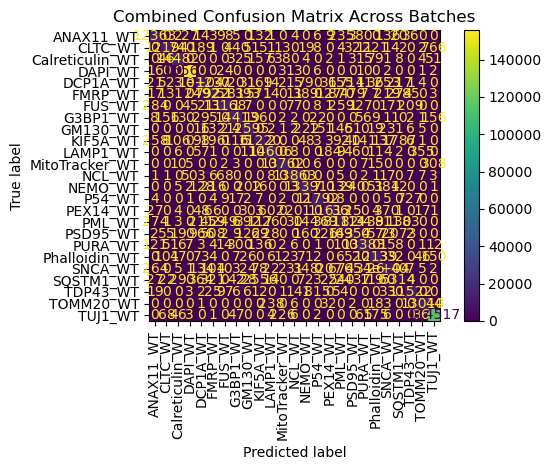


=== Evaluation Metrics (from aggregated confusion) ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV       F1  Overall Accuracy
      ANAX11_WT_Untreated  0.996285     0.938439     0.997630 0.902014 0.998567 0.919866               NaN
        CLTC_WT_Untreated  0.995909     0.868642     0.999067 0.958497 0.996748 0.911360               NaN
Calreticulin_WT_Untreated  0.998550     0.969733     0.999311 0.973842 0.999200 0.971783               NaN
        DAPI_WT_Untreated  0.999619     0.999505     0.999660 0.999076 0.999818 0.999290               NaN
       DCP1A_WT_Untreated  0.986375     0.766859     0.991476 0.676447 0.994565 0.718821               NaN
        FMRP_WT_Untreated  0.983774     0.564808     0.994160 0.705683 0.989264 0.627435               NaN
         FUS_WT_Untreated  0.997282     0.932710     0.998893 0.954618 0.998322 0.943537               NaN
       G3BP1_WT_Untreated  0.997520     0.962021     0.998461 0.943136 0.998992 0.952485

2025-08-27 14:21:06 INFO: [load_embeddings] multiplex=False
2025-08-27 14:21:06 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:21:06 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-27 14:21:06 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/cytoself_model/


Loading all batches...


2025-08-27 14:21:12 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-27 14:21:14 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-27 14:21:16 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-27 14:21:16 INFO: [load_embeddings] embeddings shape: (112878, 2048)
2025-08-27 14:21:16 INFO: [load_embeddings] labels shape: (112878,)
2025-08-27 14:21:16 INFO: [load_embeddings] example label: ANAX11_WT_Untreated
2025-08-27 14:21:16 INFO: [load_embeddings] paths shape: (112878,)
2025-08-27 14:21:17 INFO: [load_embeddings] multiplex=False
2025-08-27 14:21:17 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:21:17 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-27 14:21:17 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/cytoself_model/
2025-08-27 14:21:22 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-27 14:21:24 INFO: [embeddings_utils._filter] cel

Batches loaded.
Training on Batches: [1], Testing on: [2, 3].

=== Fold (test=[2, 3]) ===
Train: (112878, 2048) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Test: (177025, 2048) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
ANAX11_WT_Untreated: 2614
CLTC_WT_Untreated: 2439
Calreticulin_WT_Untreated: 3056
DAPI_WT_Untreated: 30429
DCP1A_WT_Untreated: 2364
FMRP_WT_Untreated: 2913
FUS_WT_Untreated: 2728
G3BP1_WT_Untreated: 2842
GM130_WT_Untreated: 2371
KIF5A_WT_Untreated: 2622
LAMP1_WT_Untreated: 3067
MitoTracker_WT_Untreated: 2728
NCL_WT_Untreated: 2709
NEMO_WT_Untreated: 2935
P54_WT_Untreated: 2623
PEX14_WT_Untreated: 2505
PML_WT_Untreated: 2297
PSD95_WT_Untreated: 2101
PURA_WT_Untreated: 2712
Phalloidin_WT_Untreated: 2219
SNCA_WT_Untreated: 2454
SQSTM1_WT_Untreated: 2651
TDP43_WT_Untreated: 2535
TOMM20_WT_Untreated: 2363
TUJ1_WT_Untreated: 22601


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3973
           1       0.97      0.78      0.87      4580
           2       0.95      0.96      0.95      4411
           3       1.00      1.00      1.00     47422
           4       0.77      0.64      0.70      4220
           5       0.51      0.81      0.62      4100
           6       0.95      0.89      0.92      4331
           7       0.91      0.95      0.93      4649
           8       0.94      0.91      0.93      4255
           9       0.82      0.67      0.74      4462
          10       0.91      0.95      0.93      4583
          11       0.97      0.96      0.97      4331
          12       0.96      0.99      0.97      4312
          13       0.91      0.89      0.90      4477
          14       0.92      0.90      0.91      3667
          15       0.96      0.86      0.91      3929
          16       0.83      0.54      0.66      3441
          17       0.59    

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4464
           1       0.90      0.81      0.85      4483
           2       0.95      0.97      0.96      5388
           3       1.00      1.00      1.00     53028
           4       0.70      0.73      0.71      4265
           5       0.64      0.54      0.58      4405
           6       0.96      0.94      0.95      4823
           7       0.93      0.95      0.94      5226
           8       0.88      0.92      0.90      4516
           9       0.79      0.69      0.74      4980
          10       0.92      0.93      0.92      5407
          11       0.97      0.96      0.96      4823
          12       0.95      0.96      0.95      4794
          13       0.78      0.96      0.86      5052
          14       0.92      0.90      0.91      4374
          15       0.93      0.85      0.89      4360
          16       0.70      0.65      0.68      3920
          17       0.59    

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4737
           1       0.91      0.88      0.89      4975
           2       0.93      0.97      0.95      5135
           3       1.00      1.00      1.00     55252
           4       0.53      0.71      0.61      4683
           5       0.53      0.23      0.32      5521
           6       0.95      0.85      0.90      4964
           7       0.93      0.93      0.93      5107
           8       0.85      0.94      0.89      4481
           9       0.55      0.76      0.64      4726
          10       0.93      0.92      0.93      5310
          11       0.96      0.98      0.97      4964
          12       0.94      0.98      0.96      4936
          13       0.89      0.78      0.83      5295
          14       0.90      0.93      0.92      4539
          15       0.86      0.94      0.90      4579
          16       0.57      0.67      0.62      4115
          17       0.42    

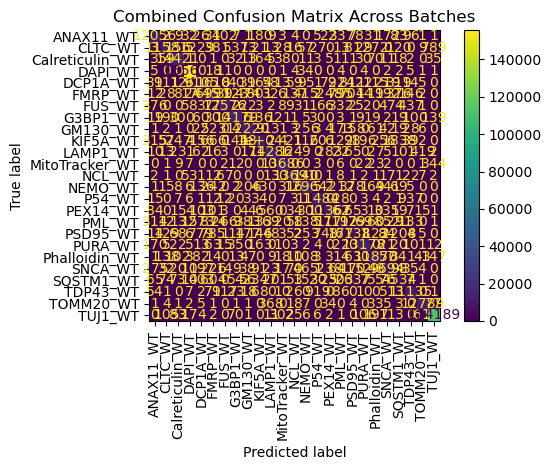


=== Evaluation Metrics (from aggregated confusion) ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV       F1  Overall Accuracy
      ANAX11_WT_Untreated  0.995004     0.915136     0.996860 0.871413 0.998025 0.892739               NaN
        CLTC_WT_Untreated  0.994074     0.824975     0.998270 0.922054 0.995669 0.870817               NaN
Calreticulin_WT_Untreated  0.997551     0.965649     0.998394 0.940827 0.999091 0.953076               NaN
        DAPI_WT_Untreated  0.999367     0.999409     0.999352 0.998236 0.999783 0.998822               NaN
       DCP1A_WT_Untreated  0.984360     0.691449     0.991167 0.645287 0.992818 0.667571               NaN
        FMRP_WT_Untreated  0.977974     0.498431     0.989862 0.549305 0.987594 0.522633               NaN
         FUS_WT_Untreated  0.996214     0.890778     0.998846 0.950639 0.997278 0.919735               NaN
       G3BP1_WT_Untreated  0.996630     0.946402     0.997962 0.924918 0.998577 0.935537

({'Accuracy': 0.9927105273143085,
  'Sensitivity': 0.8387884065993044,
  'Specificity': 0.9962407741636886,
  'PPV': 0.8385928453183551,
  'NPV': 0.9962559684225749,
  'F1': 0.83825141497396,
  'Overall Accuracy': 0.9088815914288573},
 {'Accuracy': 0.992745938579751,
  'Sensitivity': 0.8401940937737447,
  'Specificity': 0.996258802470992,
  'PPV': 0.8437008468986761,
  'NPV': 0.9962782356958062,
  'F1': 0.8385317462803888,
  'Overall Accuracy': 0.9093242322468879})

In [9]:
## New Train on one batch, test on rest


run_baseline_model(
    dataset_config= Cytoself_dataset_config,
    batches=[1, 2, 3],
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    train_each_as_singleton=True,
    results_csv = 'classification_results-NIH-training_iteration.csv'
)
run_baseline_model(
    dataset_config= Cytoself_dataset_config,
    batches=[1, 2, 3],
    classifier_class=LinearSVC,
    classifier_kwargs={"C": 1.0, "max_iter": 1000, "random_state": 42},
    train_each_as_singleton=True,
    results_csv = 'classification_results-NIH-training_iteration.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= Cytoself_dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= Cytoself_dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
)

In [ ]:
run_train_test_split_baseline(
    Cytoself_dataset_config,        
    batches=[1],  
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},     
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= Cytoself_dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=GaussianNB,
    classifier_kwargs={},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= Cytoself_dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=RidgeClassifier,
    classifier_kwargs={},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= Cytoself_dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=LinearSVC,
    classifier_kwargs={"C": 1.0, "max_iter": 1000, "random_state": 42},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
run_baseline_model(
    Cytoself_dataset_config,
    batches=[1,2,3,],
    classifier_class=cuRF,
    classifier_kwargs={"n_estimators": 300, "random_state": 42},  # max_depth=0 => unlimited in cuML
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
run_baseline_model(Cytoself_dataset_config,
    batches=[1,2,3],
    classifier_class=ExtraTreesClassifier,
    classifier_kwargs={"n_estimators": 300, "max_depth": None, "min_samples_leaf": 1,
                                     "n_jobs": -1, "random_state": 42},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

## Pretrained Model

In [10]:
pretrained_dataset_config = {
    "path_to_embeddings": "/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/pretrained_model",
    "multiplexed": False,
    "config_fmt": "NIH_UMAP1_DatasetConfig_B{batch}",
    "config_dir": "manuscript/manuscript_figures_data_config",
}

2025-08-27 14:25:48 INFO: [load_embeddings] multiplex=False
2025-08-27 14:25:48 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:25:48 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-27 14:25:48 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/pretrained_model


Loading all batches...


2025-08-27 14:25:51 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-27 14:25:52 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-27 14:25:53 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-27 14:25:53 INFO: [load_embeddings] embeddings shape: (115590, 192)
2025-08-27 14:25:53 INFO: [load_embeddings] labels shape: (115590,)
2025-08-27 14:25:53 INFO: [load_embeddings] example label: CLTC_WT_Untreated
2025-08-27 14:25:53 INFO: [load_embeddings] paths shape: (115590,)
2025-08-27 14:25:53 INFO: [load_embeddings] multiplex=False
2025-08-27 14:25:53 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:25:53 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-27 14:25:53 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/pretrained_model
2025-08-27 14:26:06 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-27 14:26:07 INFO: [embeddings_utils._fi

Batches loaded.
Training on Batches: [1], Testing on: [2, 3].

=== Fold (test=[2, 3]) ===
Train: (115590, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Test: (181189, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
CLTC_WT_Untreated: 2439
DAPI_WT_Untreated: 30429
GM130_WT_Untreated: 2371
PURA_WT_Untreated: 2712
PSD95_WT_Untreated: 2101
SQSTM1_WT_Untreated: 2651
SNCA_WT_Untreated: 2454
G3BP1_WT_Untreated: 2842
PEX14_WT_Untreated: 2505
KIF5A_WT_Untreated: 2622
NEMO_WT_Untreated: 2935
MitoTracker_WT_Untreated: 2728
TIA1_WT_Untreated: 2712
NCL_WT_Untreated: 2709
TUJ1_WT_Untreated: 22601
P54_WT_Untreated: 2623
ANAX11_WT_Untreated: 2614
DCP1A_WT_Untreated: 2364
TOMM20_WT_Untreated: 2363
FMRP_WT_Untreated: 2913
FUS_WT_Untreated: 2728
PML_WT_Untreated: 2297
Calreticulin_WT_Untreated: 3056
TDP43_WT_Untreated: 2535
Phalloidin_WT_Untreated: 2219
LAMP1_WT_Untreated: 3067
              precision    recall 


=== Fold (test=[1, 2]) ===
Train: (87130, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Test: (209649, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
MitoTracker_WT_Untreated: 2095
FUS_WT_Untreated: 2095
DAPI_WT_Untreated: 22599
PEX14_WT_Untreated: 1855
TUJ1_WT_Untreated: 16469
NCL_WT_Untreated: 2085
Phalloidin_WT_Untreated: 2152
TOMM20_WT_Untreated: 2200
GM130_WT_Untreated: 2145
SQSTM1_WT_Untreated: 1484
CLTC_WT_Untreated: 2044
TDP43_WT_Untreated: 1836
TIA1_WT_Untreated: 2078
NEMO_WT_Untreated: 2117
LAMP1_WT_Untreated: 2340
PML_WT_Untreated: 1623
PSD95_WT_Untreated: 1903
DCP1A_WT_Untreated: 1901
Calreticulin_WT_Untreated: 2332
G3BP1_WT_Untreated: 2384
PURA_WT_Untreated: 2085
KIF5A_WT_Untreated: 2358
ANAX11_WT_Untreated: 1850
SNCA_WT_Untreated: 1857
FMRP_WT_Untreated: 1492
P54_WT_Untreated: 1751
              precision    recall  f1-score   support

           0       0.84      0.97      0.9

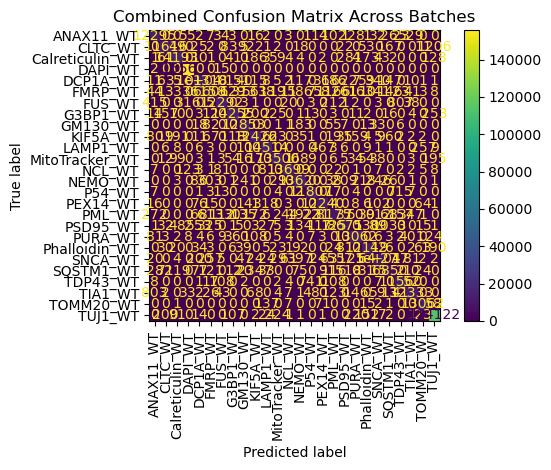

2025-08-27 14:26:22 INFO: [load_embeddings] multiplex=False
2025-08-27 14:26:22 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:26:22 INFO: [load_embeddings] input_folders = ['batch1']
2025-08-27 14:26:22 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/pretrained_model



=== Evaluation Metrics (from aggregated confusion) ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV       F1  Overall Accuracy
      ANAX11_WT_Untreated  0.995470     0.933278     0.996881 0.871677 0.998483 0.901426               NaN
        CLTC_WT_Untreated  0.994792     0.827468     0.998846 0.945543 0.995833 0.882574               NaN
Calreticulin_WT_Untreated  0.997483     0.950382     0.998699 0.949619 0.998719 0.950000               NaN
        DAPI_WT_Untreated  0.999067     0.999891     0.998774 0.996563 0.999961 0.998224               NaN
       DCP1A_WT_Untreated  0.986657     0.763973     0.991709 0.676439 0.994629 0.717546               NaN
        FMRP_WT_Untreated  0.982128     0.470982     0.994499 0.674495 0.987289 0.554660               NaN
         FUS_WT_Untreated  0.996198     0.870662     0.999256 0.966124 0.996856 0.915912               NaN
       G3BP1_WT_Untreated  0.996430     0.951475     0.997594 0.911037 0.998742 0.930817

2025-08-27 14:26:24 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-27 14:26:25 INFO: [embeddings_utils._filter] cell_lines = ['WT']
2025-08-27 14:26:26 INFO: [embeddings_utils._filter] conditions = ['Untreated']
2025-08-27 14:26:26 INFO: [load_embeddings] embeddings shape: (115590, 192)
2025-08-27 14:26:26 INFO: [load_embeddings] labels shape: (115590,)
2025-08-27 14:26:26 INFO: [load_embeddings] example label: CLTC_WT_Untreated
2025-08-27 14:26:26 INFO: [load_embeddings] paths shape: (115590,)
2025-08-27 14:26:26 INFO: [load_embeddings] multiplex=False
2025-08-27 14:26:26 INFO: [load_embeddings] experiment_type = NIH
2025-08-27 14:26:26 INFO: [load_embeddings] input_folders = ['batch2']
2025-08-27 14:26:26 INFO: [load_embeddings] model_output_folder = /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/pretrained_model
2025-08-27 14:26:28 INFO: [embeddings_utils._filter] markers_to_exclude = ['CD41']
2025-08-27 14:26:28 INFO: [embeddings_utils._fi

Batches loaded.
Training on Batches: [1], Testing on: [2, 3].

=== Fold (test=[2, 3]) ===
Train: (115590, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Test: (181189, 192) Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
CLTC_WT_Untreated: 2439
DAPI_WT_Untreated: 30429
GM130_WT_Untreated: 2371
PURA_WT_Untreated: 2712
PSD95_WT_Untreated: 2101
SQSTM1_WT_Untreated: 2651
SNCA_WT_Untreated: 2454
G3BP1_WT_Untreated: 2842
PEX14_WT_Untreated: 2505
KIF5A_WT_Untreated: 2622
NEMO_WT_Untreated: 2935
MitoTracker_WT_Untreated: 2728
TIA1_WT_Untreated: 2712
NCL_WT_Untreated: 2709
TUJ1_WT_Untreated: 22601
P54_WT_Untreated: 2623
ANAX11_WT_Untreated: 2614
DCP1A_WT_Untreated: 2364
TOMM20_WT_Untreated: 2363
FMRP_WT_Untreated: 2913
FUS_WT_Untreated: 2728
PML_WT_Untreated: 2297
Calreticulin_WT_Untreated: 3056
TDP43_WT_Untreated: 2535
Phalloidin_WT_Untreated: 2219
LAMP1_WT_Untreated: 3067


/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3973
           1       0.98      0.78      0.87      4580
           2       0.97      0.97      0.97      4411
           3       1.00      1.00      1.00     47422
           4       0.85      0.76      0.81      4220
           5       0.75      0.71      0.73      4100
           6       0.98      0.91      0.95      4331
           7       0.89      0.98      0.93      4649
           8       0.95      0.98      0.96      4255
           9       0.94      0.84      0.89      4462
          10       0.97      0.97      0.97      4583
          11       0.96      0.97      0.97      4331
          12       0.98      0.99      0.99      4312
          13       0.90      0.96      0.93      4477
          14       0.94      0.92      0.93      3667
          15       0.97      0.95      0.96      3929
          16       0.82      0.73      0.77      3441
          17       0.75    

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4464
           1       0.95      0.80      0.87      4483
           2       0.97      0.97      0.97      5388
           3       1.00      1.00      1.00     53028
           4       0.82      0.77      0.79      4265
           5       0.75      0.63      0.69      4405
           6       0.97      0.96      0.97      4823
           7       0.92      0.97      0.95      5226
           8       0.94      0.98      0.96      4516
           9       0.89      0.90      0.90      4980
          10       0.96      0.96      0.96      5407
          11       0.98      0.97      0.97      4823
          12       0.99      0.99      0.99      4794
          13       0.85      0.98      0.91      5052
          14       0.95      0.95      0.95      4374
          15       0.95      0.94      0.95      4360
          16       0.77      0.76      0.77      3920
          17       0.75    

/home/projects/hornsteinlab/galavir/.conda/envs/nova/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.97      0.92      4737
           1       0.93      0.95      0.94      4975
           2       0.94      0.97      0.95      5135
           3       1.00      1.00      1.00     55252
           4       0.52      0.85      0.65      4683
           5       0.54      0.16      0.25      5521
           6       0.98      0.87      0.92      4964
           7       0.96      0.95      0.95      5107
           8       0.94      0.99      0.96      4481
           9       0.60      0.91      0.73      4726
          10       0.96      0.95      0.96      5310
          11       0.97      0.97      0.97      4964
          12       0.99      0.99      0.99      4936
          13       0.95      0.87      0.91      5295
          14       0.93      0.96      0.94      4539
          15       0.90      0.98      0.94      4579
          16       0.76      0.78      0.77      4115
          17       0.75    

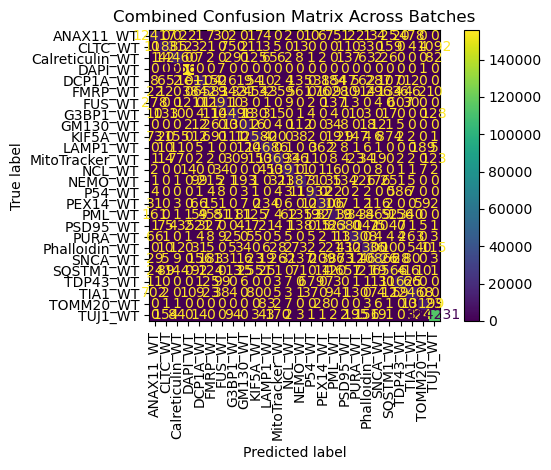


=== Evaluation Metrics (from aggregated confusion) ===
                    Label  Accuracy  Sensitivity  Specificity      PPV      NPV       F1  Overall Accuracy
      ANAX11_WT_Untreated  0.996324     0.942538     0.997545 0.897052 0.998694 0.919233               NaN
        CLTC_WT_Untreated  0.995306     0.846631     0.998908 0.949433 0.996295 0.895090               NaN
Calreticulin_WT_Untreated  0.998218     0.968260     0.998991 0.961181 0.999181 0.964707               NaN
        DAPI_WT_Untreated  0.999692     0.999949     0.999600 0.998877 0.999982 0.999413               NaN
       DCP1A_WT_Untreated  0.987080     0.795033     0.991437 0.678088 0.995331 0.731919               NaN
        FMRP_WT_Untreated  0.982969     0.469343     0.995400 0.711753 0.987262 0.565671               NaN
         FUS_WT_Untreated  0.997407     0.914435     0.999429 0.975002 0.997918 0.943748               NaN
       G3BP1_WT_Untreated  0.997121     0.967695     0.997883 0.922089 0.999162 0.944341

({'Accuracy': 0.9952457500751012,
  'Sensitivity': 0.893869851790201,
  'Specificity': 0.9975428014404553,
  'PPV': 0.8946018350211619,
  'NPV': 0.9975597444803529,
  'F1': 0.8923258813580811,
  'Overall Accuracy': 0.9381947509763157},
 {'Accuracy': 0.9952779985005705,
  'Sensitivity': 0.8954134727257955,
  'Specificity': 0.9975588468110604,
  'PPV': 0.8979701162038985,
  'NPV': 0.99757876331903,
  'F1': 0.8930041853910872,
  'Overall Accuracy': 0.9386139805074171})

In [11]:
## New Train on one batch, test on rest


run_baseline_model(
    dataset_config= pretrained_dataset_config,
    batches=[1, 2, 3],
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    train_each_as_singleton=True,
    results_csv = 'classification_results-NIH-training_iteration.csv'
)
run_baseline_model(
    dataset_config= pretrained_dataset_config,
    batches=[1, 2, 3],
    classifier_class=LinearSVC,
    classifier_kwargs={"C": 1.0, "max_iter": 1000, "random_state": 42},
    train_each_as_singleton=True,
    results_csv = 'classification_results-NIH-training_iteration.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= pretrained_dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=cuMLLogisticRegression,
    classifier_kwargs={},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= pretrained_dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=GaussianNB,
    classifier_kwargs={},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= pretrained_dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=RidgeClassifier,
    classifier_kwargs={},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
## Baseline
run_baseline_model(
    dataset_config= pretrained_dataset_config,
    batches=[1, 2, 3],
    balance=False,
    norm=False,
    choose_features=False,
    top_k=100,
    label_map=None,
    classifier_class=LinearSVC,
    classifier_kwargs={"C": 1.0, "max_iter": 1000, "random_state": 42},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
run_baseline_model(
    pretrained_dataset_config,
    batches=[1,2,3,],
    classifier_class=cuRF,
    classifier_kwargs={"n_estimators": 300, "random_state": 42}, 
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)

In [ ]:
run_baseline_model(pretrained_dataset_config,
    batches=[1,2,3],
    classifier_class=ExtraTreesClassifier,
    classifier_kwargs={"n_estimators": 300, "max_depth": None, "min_samples_leaf": 1,
                                     "n_jobs": -1, "random_state": 42},
    train_specific_batches = [1],
    results_csv = 'classification_results-NIH.csv'
)